# 3.1 Revisit IF Neuron (part 1)

First, import some important library

In [1]:
import torch
from spikingjelly.activation_based import neuron
from spikingjelly import visualizing
from matplotlib import pyplot as plt

Let's return to IF neuron, here we can initialize a whole layer

In [2]:
if_layer = neuron.IFNode()
print(if_layer.v)
print(if_layer)

0.0
IFNode(
  v_threshold=1.0, v_reset=0.0, detach_reset=False, step_mode=s, backend=torch
  (surrogate_function): Sigmoid(alpha=4.0, spiking=True)
)


## Shape of membrane potential
As mentioned earlier, the shape of v adapts to the shape of input (x)

In [3]:
x = torch.rand(size=[2, 3])
if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')
# x.shape=torch.Size([2, 3]), if_layer.v.shape=torch.Size([2, 3])
if_layer.reset()

x = torch.rand(size=[4, 5, 6])
if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')
# x.shape=torch.Size([4, 5, 6]), if_layer.v.shape=torch.Size([4, 5, 6])
if_layer.reset()

x.shape=torch.Size([2, 3]), if_layer.v.shape=torch.Size([2, 3])
x.shape=torch.Size([4, 5, 6]), if_layer.v.shape=torch.Size([4, 5, 6])


## Operation of IF neuron

The membrane potential is updated using this code in `spikingjelly.activation_based.neuron.IFNode.neuronal_charge`

```python
def neuronal_charge(self, x: torch.Tensor):
    self.v = self.v + x
```


Neuron fires using this code in `spikingjelly.activation_based.neuron.BaseNode.neuronal_fire`:

```python
def neuronal_fire(self):
    self.spike = self.surrogate_function(self.v - self.v_threshold)
   
```

``surrogate_function()`` is the step function in forward, which returns 1 when input is greater or equal to 0, otherwise returns 0. 


To reset the membrane potential, a similar code is used:

```python
def neuronal_reset(self):
    if self.v_reset is None:
        self.v = self.v - self.spike * self.v_threshold
    else:
        self.v = (1. - self.spike) * self.v + self.spike * self.v_reset
```

In other words, if there is no ``v_reset`` is set, the neuron reset by subtracting its membrane potential to the threshold voltage

# Graph

The following code generate a graph of a neurons

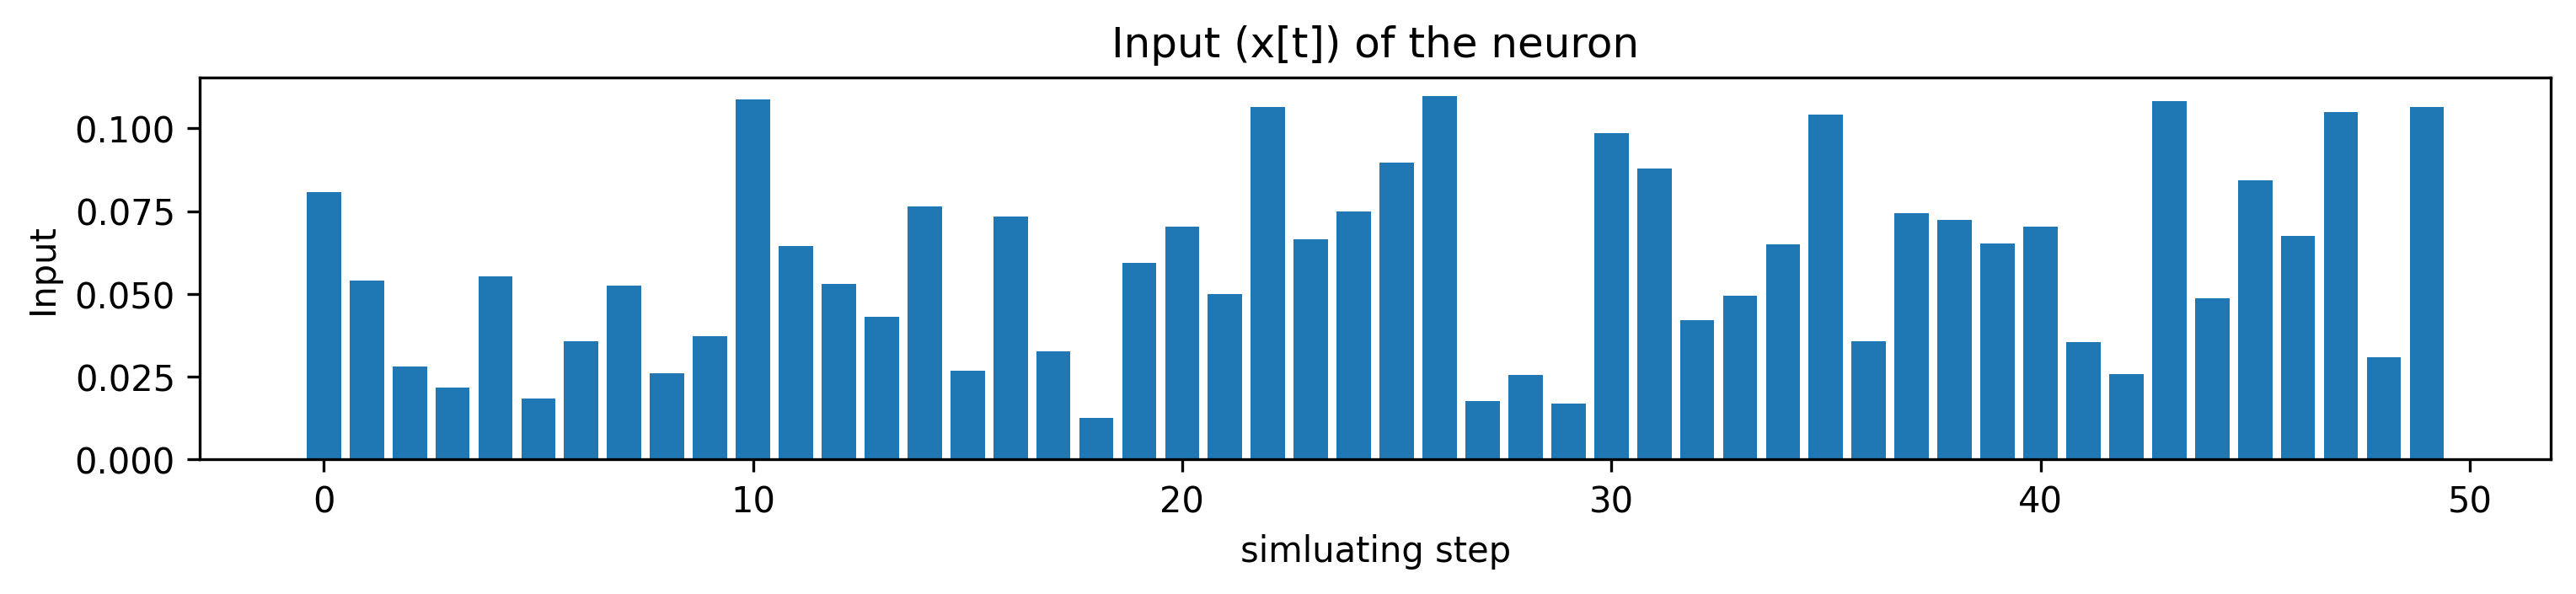

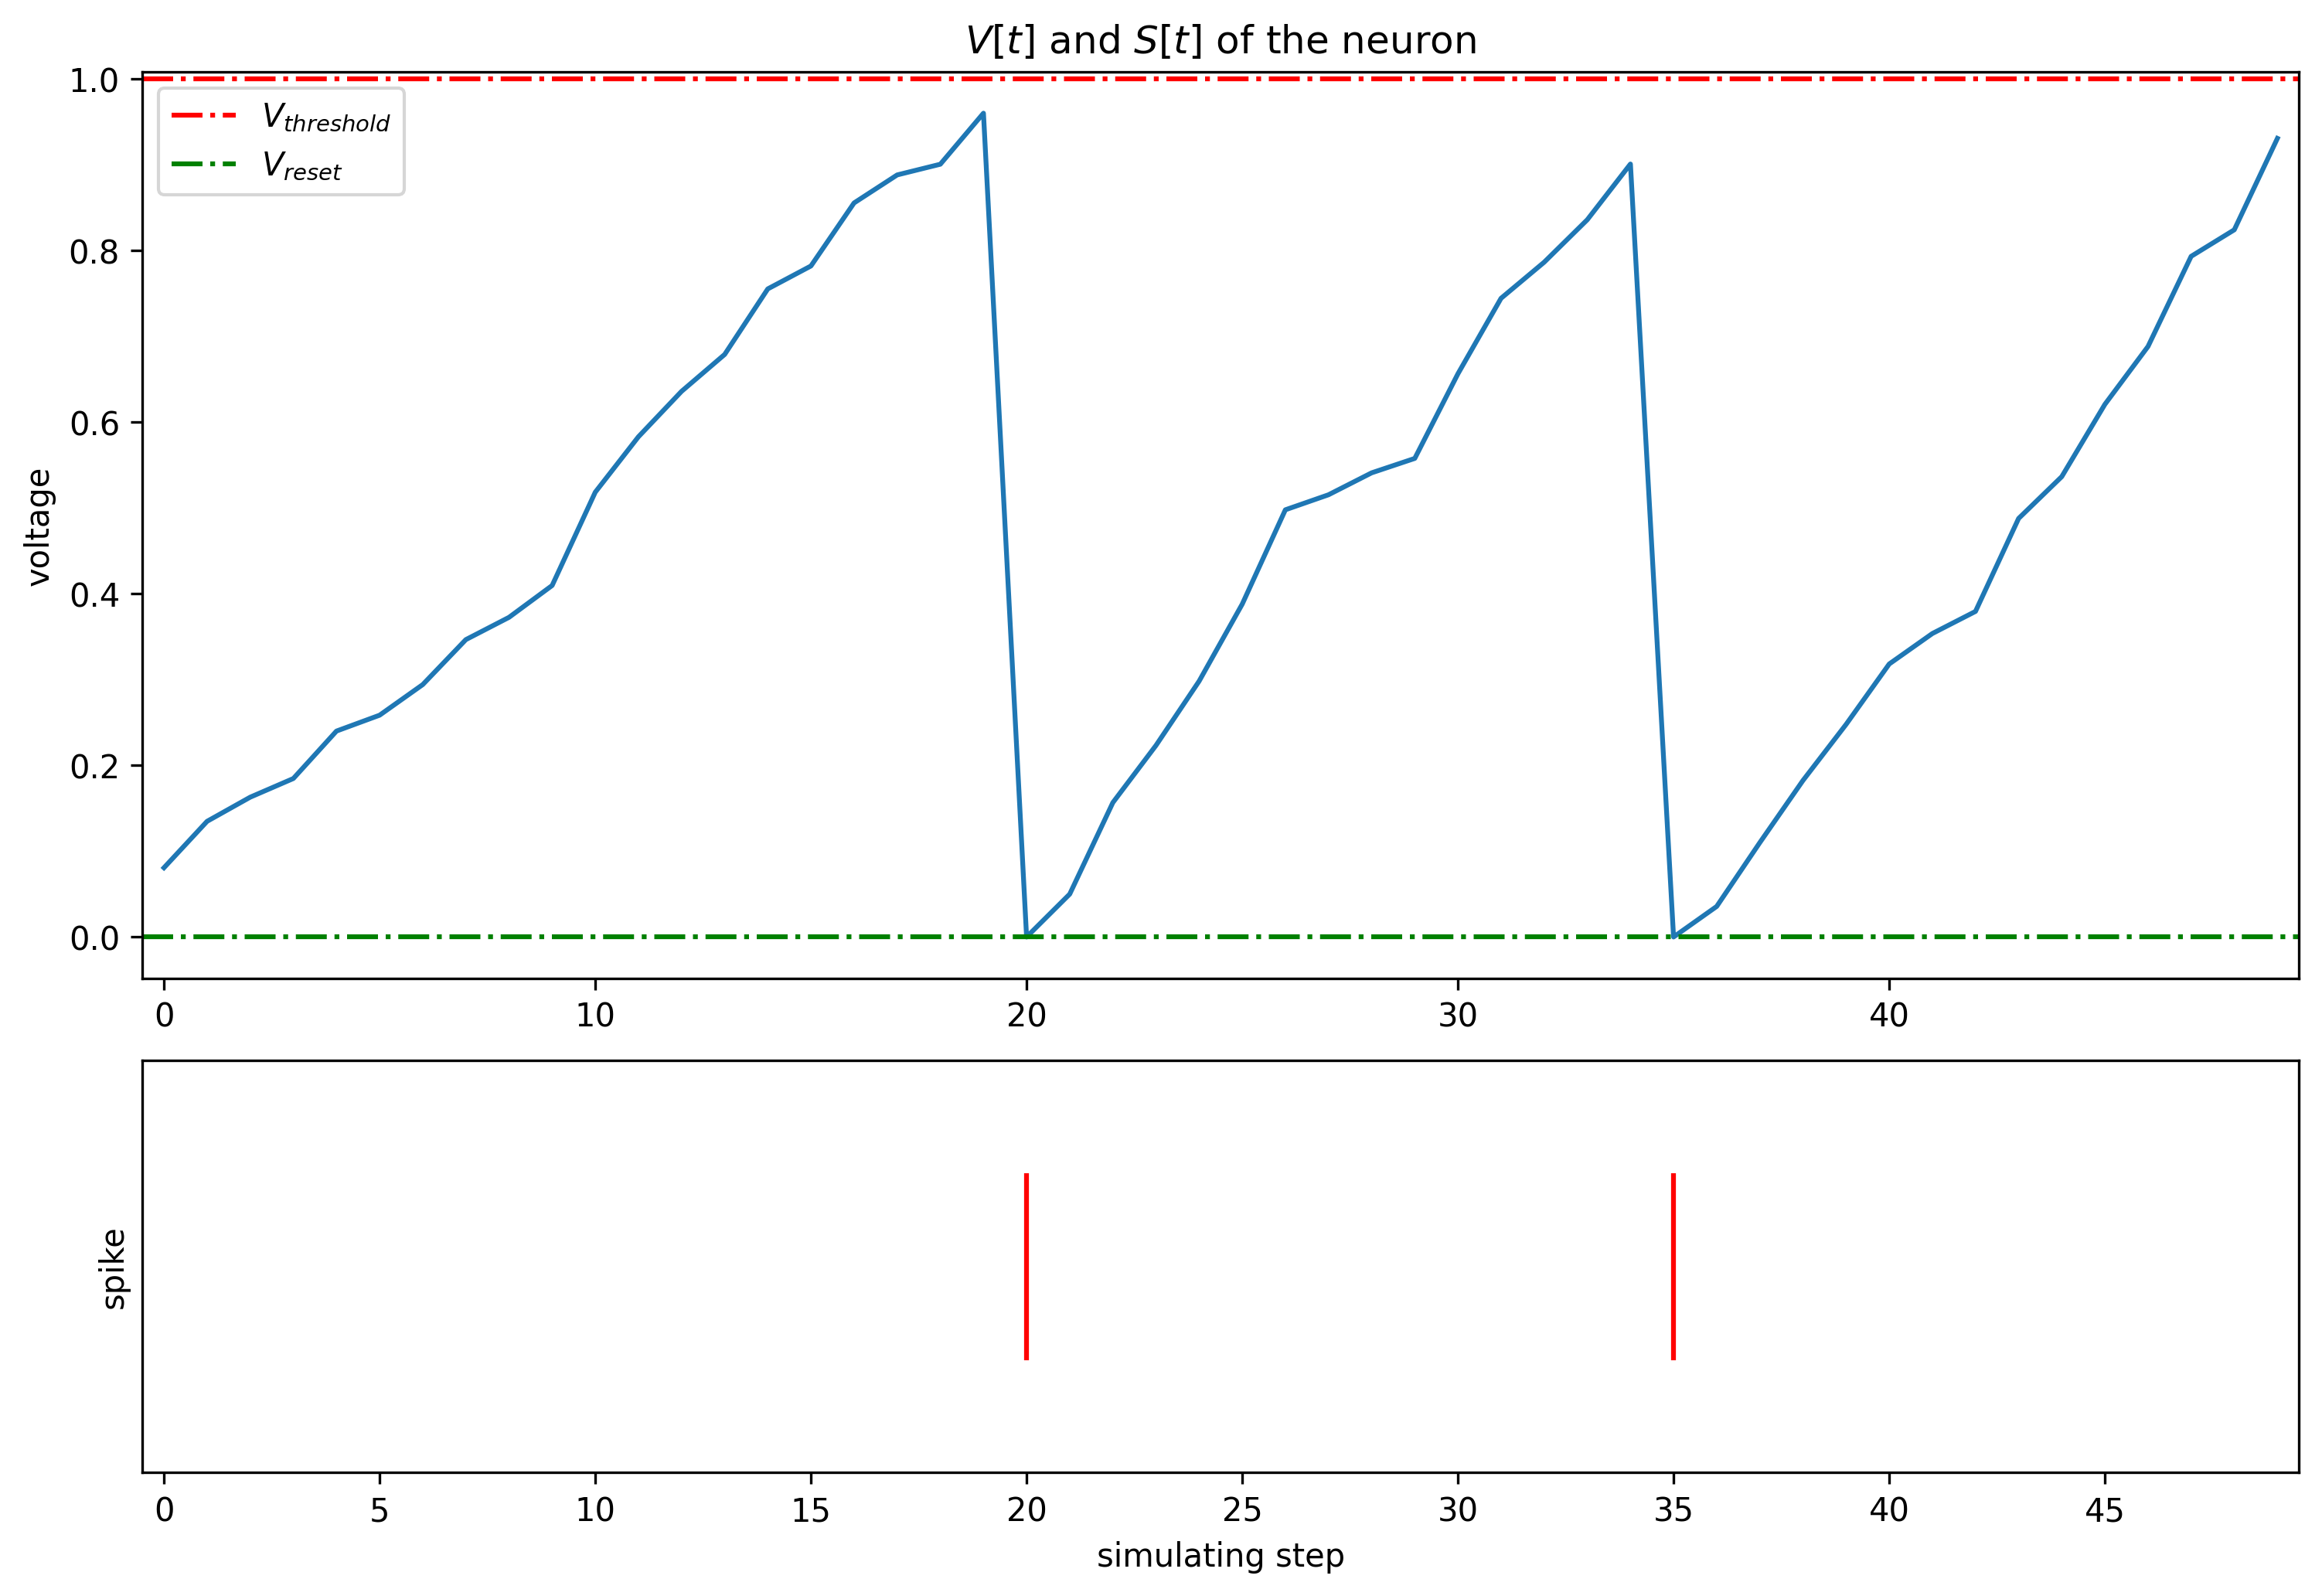

In [7]:
if_layer.reset()

T = 50
x = torch.rand(T)*0.1+0.01
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x[t]))
    v_list.append(if_layer.v)


    
dpi = 300
figsize = (12, 8)


import numpy as np
fig, ax = plt.subplots(figsize=(12, 2), dpi=dpi)
tx = np.arange(0, T)
ax.bar(tx, x)
ax.set_title("Input (x[t]) of the neuron")
ax.set_ylabel('Input')
ax.set_xlabel('simluating step')
plt.show()

visualizing.plot_one_neuron_v_s(
    torch.stack(v_list).numpy(), 
    torch.stack(s_list).numpy(), 
    v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()